Tarea 8.1

Tome 20 puntos entre $x = -2$ y $x = 2$ para interpolar la función $\tanh(x)$. Hágalo usando la spline cúbica introducida en clase y la función de scipy. ¿Cuál tiene un error mayor?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1) Spline cúbica

In [2]:
def spline_coefs(puntos):
    
    n = len(puntos) - 1
    
    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]
    
    a = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])
        
        
    # Se resuelve un sistema de ecuaciones:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    return a, b, c, d


In [3]:
#definimos la interpolación
def spline_eval(x, coefs, puntos):

    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_ind(x, puntos)
    a, b, c, d = coefs
    return (a[i] + b[i]*(x - puntos[i][0]) + \
            c[i]*(x - puntos[i][0])**2 + d[i]*(x - puntos[i][0])**3)

In [4]:
def find_ind(x, puntos):   #localiza puntos en sus polinomios
    for i in range(len(puntos)):
        if x < puntos[i,0] and i != 0:
            return i-1

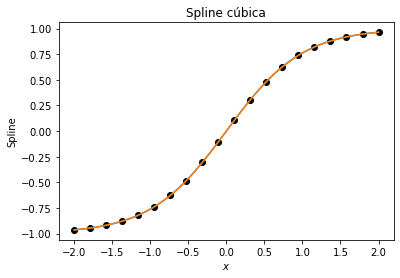

In [29]:
mini = -2   #valor mínimo
maxi = 2    #valor máximo
order = 20  #cantidad de puntos usados en las interpolación

xp = np.linspace(mini, maxi, order)
puntos = np.array([[xi, np.tanh(xi)] for xi in xp])
coefs= spline_coefs(puntos)


x = np.linspace(mini, maxi, 100)
exact = np.tanh(x)
spline = [spline_eval(xi, coefs, puntos) for xi in x]

plt.title('Spline cúbica')
plt.ylabel('Spline')
plt.xlabel('$x$')
plt.scatter(puntos[:,0], puntos[:,1], color='black')
plt.plot(x, exact)
plt.plot(x, spline)

2) Scipy

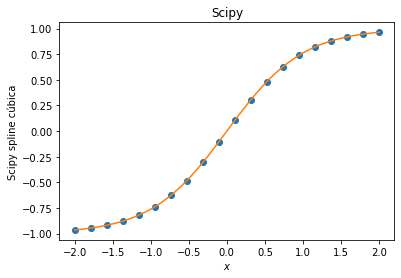

In [23]:
from scipy.interpolate import interp1d

x = np.linspace(-2, 2, num=20)
y = np.tanh(x)
f = interp1d(x, y, kind='cubic')
xnew = np.linspace(-2, 2, num=100)

plt.title('Scipy')
plt.ylabel('Scipy spline cúbica')
plt.xlabel('$x$')
plt.plot(x, y, 'o', xnew, f(xnew))
plt.show()

#

In [30]:
print('el error promedio para la interpolación con spline tomando 20 puntos es', np.mean(abs(np.tanh(x)-spline)/abs(np.tanh(x))))

el error promedio para la interpolación con spline tomando 20 puntos es 4.061925299382007e-05


In [31]:
print('el error promedio para la interpolación con scipy tomando 20 puntos es', np.mean(abs(np.tanh(x)-f(xnew))/abs(np.tanh(x))))

el error promedio para la interpolación con scipy tomando 20 puntos es 1.699529979834349e-05


Se puede apreciar que el error de Scipy es un poco menor, pero aún asi ambos métodos tienen errores de un orden de 10e-05. 

# Calificación: 7.0